# Final Project: Statistical Analysis of Student Performance

## Project Scenario

You are a teacher conducting a study on factors influencing student performance in exams. You have obtained the "Student Performance" dataset from Kaggle, which contains information about students' demographics and their scores in different subjects. Your task is to analyze the data, identify patterns, and draw conclusions about factors affecting student performance.

Dataset Link: [Student Performance Dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)

## Instructions

You are required to perform the following analyses and answer the questions using the data provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Basic Statistical Analysis
Calculate the mean and standard deviation for the math score, reading score, and writing score columns.

In [3]:
# Calculate mean
math_mean = data['math score'].mean()
reading_mean = data['reading score'].mean()
writing_mean = data['writing score'].mean()

# Calculate standard deviation
math_std = data['math score'].std()
reading_std = data['reading score'].std()
writing_std = data['writing score'].std()

print(f"Mean Math Score: {math_mean}, Std: {math_std}")
print(f"Mean Reading Score: {reading_mean}, Std: {reading_std}")
print(f"Mean Writing Score: {writing_mean}, Std: {writing_std}")

Mean Math Score: 66.089, Std: 15.16308009600945
Mean Reading Score: 69.169, Std: 14.600191937252216
Mean Writing Score: 68.054, Std: 15.19565701086965


# 2. Probabilities

Calculate the probability that a student is Male or has a Math_Score above 80.

In [4]:
# Calculate probabilities
p_male = len(data[data['gender'] == 'male']) / len(data)
p_math_above_80 = len(data[data['math score'] > 80]) / len(data)
p_male_and_math_above_80 = len(data[(data['gender'] == 'male') & (data['math score'] > 80)]) / len(data)

# Union probability
p_union = p_male + p_math_above_80 - p_male_and_math_above_80
print(f"Probability of Male or Math Score > 80: {p_union}")

Probability of Male or Math Score > 80: 0.5499999999999999


Calculate the probability that a student is Male and has a Math_Score above 80.

In [5]:
# Calculate probabilities
p_male = len(data[data['gender'] == 'male']) / len(data)
p_math_above_80 = len(data[data['math score'] > 80]) / len(data)
p_male_and_math_above_80 = len(data[(data['gender'] == 'male') & (data['math score'] > 80)]) / len(data)

# Union probability
p_intersection = p_male_and_math_above_80
print(f"Probability of Male and Math Score > 80: {p_intersection}")

Probability of Male and Math Score > 80: 0.108


### Bayes' Theorem
Calculate the probability that a student is Male given they have a Math_Score above 80.

In [6]:
# Calculate conditional probability using Bayes' theorem
p_male_given_math_above_80 = p_intersection / p_math_above_80
print(f"Probability of Male given Math Score > 80: {p_male_given_math_above_80}")

Probability of Male given Math Score > 80: 0.6136363636363636


# 3. Normal Distribution
Check Normality
Use QQ plot, histogram, and Shapiro-Wilk test to check if Math_Score is normally distributed.

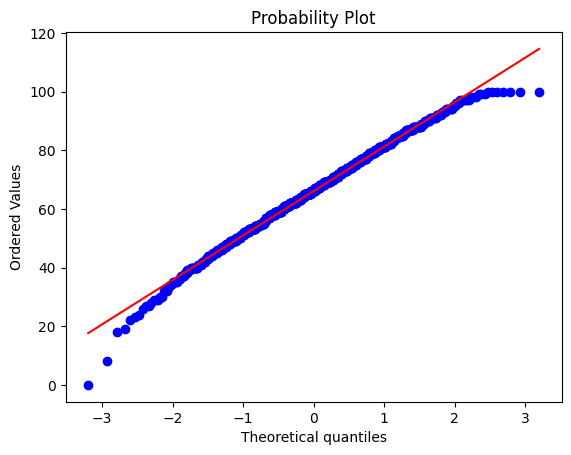

In [7]:
# QQ plot

stats.probplot(data['math score'], dist='norm', plot=plt)
plt.show()

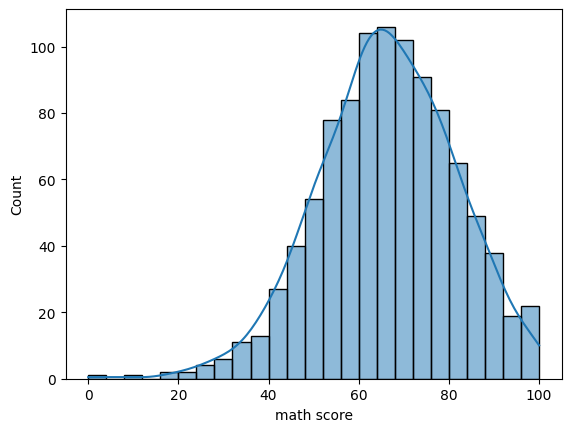

In [8]:
# Histogram

sns.histplot(data['math score'], kde=True)
plt.show()

In [9]:
# Shapiro-Wilk test

statistic, p_value = stats.shapiro(data['math score'])
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "H0 hypothesis is rejected and data is not normally distributed." )
else:
    print( "H0 hypothesis is accepted")

Shapiro-Wilk Test for Math Score: Statistic = 0.9931488633155823, p-value = 0.000144938996527344
T-statistic: 0.9931488633155823, p-value: 0.000144938996527344
H0 hypothesis is rejected and data is not normally distributed.


# 4. Z-Score and Noise Removal

Calculate the z-scores for the Math_Score column and remove noise (more than 95%).


In [10]:
# Calculate z-scores
data['Math_Score_z'] = stats.zscore(data['math score'])

# Remove noise
cleaned_data = data[np.abs(data['Math_Score_z']) <= 3]

print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {cleaned_data.shape}")

Original data size: (1000, 9)
Cleaned data size: (996, 9)


# 5. Visualizations
Generate different plots (box, histogram, scatter, pie) to visualize Math Score column before and after removing noise.

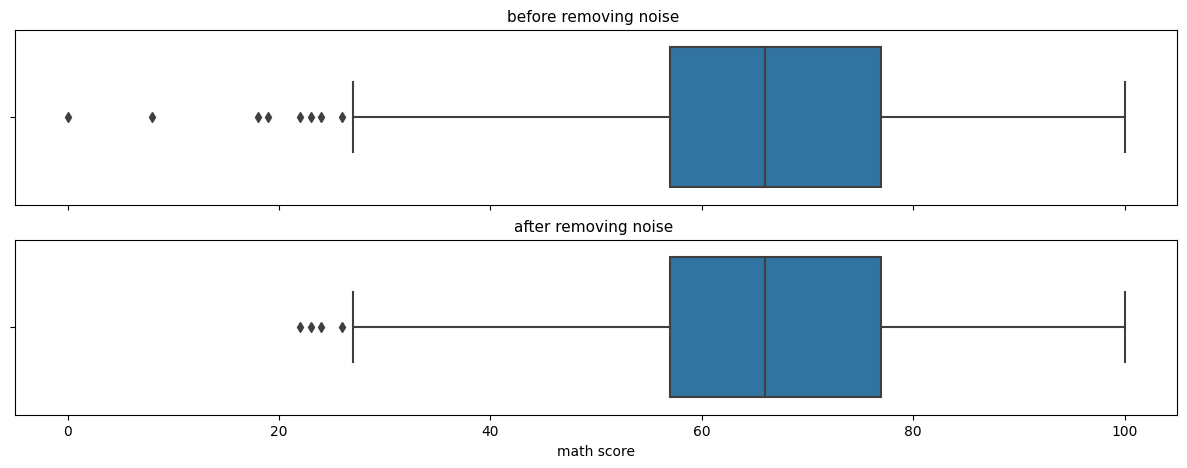

In [11]:
# Box plot

fig, axis = plt.subplots(2,1, figsize=(15, 5), sharex=True)

sns.boxplot(x= data['math score'], ax=axis[0]).set(xlabel=None)
axis[0].set_title("before removing noise ", fontdict={'fontsize':11})

sns.boxplot(x= cleaned_data['math score'], ax=axis[1])
axis[1].set_title("after removing noise ", fontdict={'fontsize':11})

plt.show()

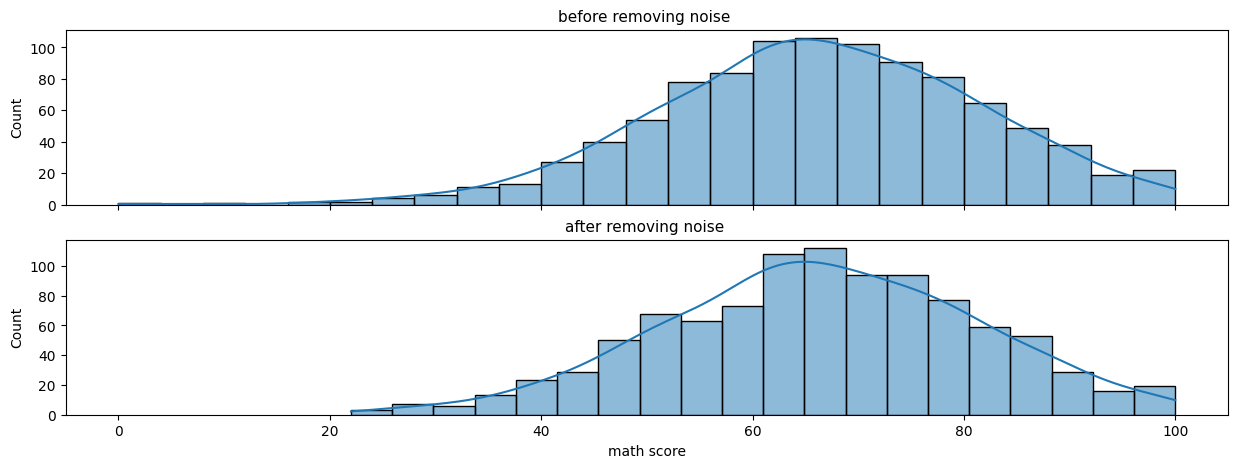

In [12]:
# Histogram

fig, axis = plt.subplots(2,1, figsize=(15, 5), sharex=True)

sns.histplot(x= data['math score'], ax=axis[0], kde=True).set(xlabel=None)
axis[0].set_title("before removing noise ", fontdict={'fontsize':11})

sns.histplot(x= cleaned_data['math score'], ax=axis[1], kde=True)
axis[1].set_title("after removing noise ", fontdict={'fontsize':11})

plt.show()

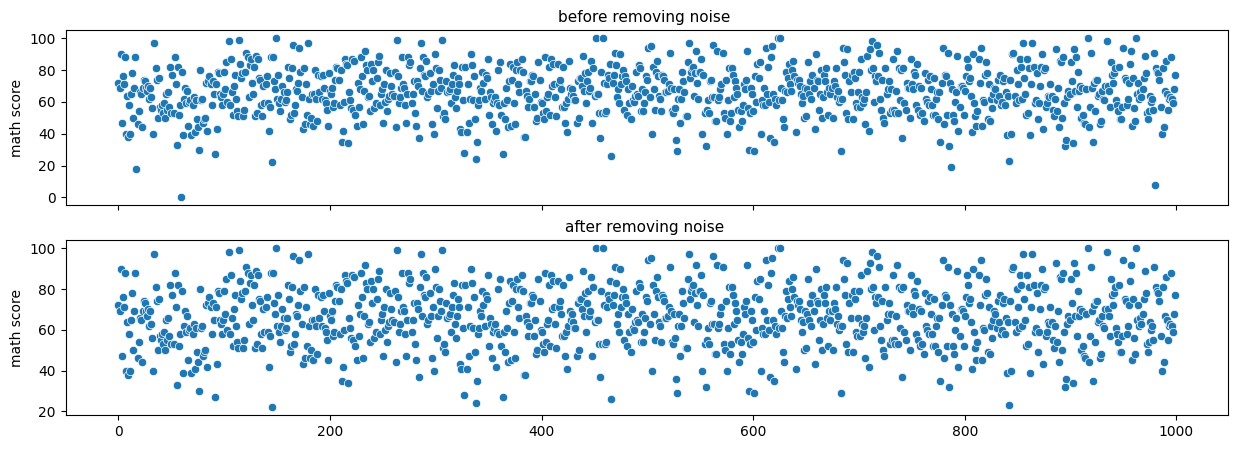

In [13]:
# Scatter plot

fig, axis = plt.subplots(2,1, figsize=(15, 5), sharex=True)

sns.scatterplot(data['math score'], ax=axis[0]).set(xlabel=None)
axis[0].set_title("before removing noise ", fontdict={'fontsize':11})

sns.scatterplot(cleaned_data['math score'], ax=axis[1])
axis[1].set_title("after removing noise ", fontdict={'fontsize':11})

plt.show()

In [33]:
# Before removing noise
q1 = np.percentile(data['math score'], 25)
q2 = np.percentile(data['math score'], 50)
q3 = np.percentile(data['math score'], 75)

min_val = np.min(data['math score'])
max_val = np.max(data['math score'])

b_min_q1 = data['math score'][(data['math score'] >= min_val) & (data['math score'] <= q1)]
b_q1_q2 = data['math score'][(data['math score'] > q1) & (data['math score'] <= q2)]
b_q2_q3 = data['math score'][(data['math score'] > q2) & (data['math score'] <= q3)]
b_q3_max = data['math score'][(data['math score'] > q3) & (data['math score'] <= max_val)]

# After removing noise
q1 = np.percentile(cleaned_data['math score'], 25)
q2 = np.percentile(cleaned_data['math score'], 50)
q3 = np.percentile(cleaned_data['math score'], 75)

min_val = np.min(cleaned_data['math score'])
max_val = np.max(cleaned_data['math score'])

a_min_q1 = cleaned_data['math score'][(cleaned_data['math score'] >= min_val) & (cleaned_data['math score'] <= q1)]
a_q1_q2 = cleaned_data['math score'][(cleaned_data['math score'] > q1) & (cleaned_data['math score'] <= q2)]
a_q2_q3 = cleaned_data['math score'][(cleaned_data['math score'] > q2) & (cleaned_data['math score'] <= q3)]
a_q3_max = cleaned_data['math score'][(cleaned_data['math score'] > q3) & (cleaned_data['math score'] <= max_val)]

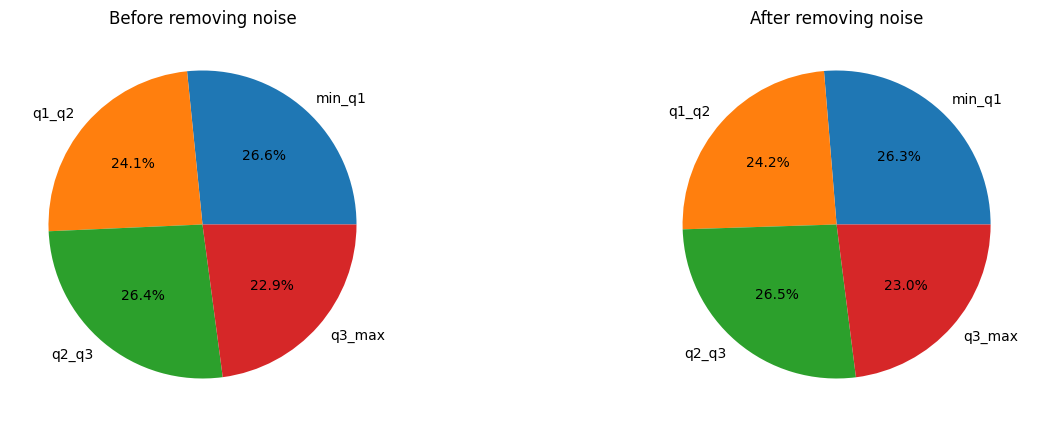

In [34]:
# Pie chart

fig, axis = plt.subplots(1,2, figsize=(15, 5), sharex=True)

axis[0].pie(x= [len(b_min_q1), len(b_q1_q2), len(b_q2_q3), len(b_q3_max)],
                   labels= ['min_q1', 'q1_q2', 'q2_q3', 'q3_max'],
                   autopct='%1.1f%%')
axis[0].set_title("Before removing noise")

axis[1].pie(x= [len(a_min_q1), len(a_q1_q2), len(a_q2_q3), len(a_q3_max)],
                   labels= ['min_q1', 'q1_q2', 'q2_q3', 'q3_max'],
                   autopct='%1.1f%%')
axis[1].set_title("After removing noise")
       
plt.show()

# 6. Parametric Hypothesis Testing

### Two samples
Perform a two-sample hypothesis test to compare the Math_Score between Male and Female students. (use cleaned data and choose  appropriate test)

In [139]:
male_math_score = cleaned_data[cleaned_data['gender'] == 'male']['math score']
female_math_score = cleaned_data[cleaned_data['gender'] == 'female']['math score']

t_statistic, p_value = stats.ttest_ind(male_math_score, female_math_score)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( 'H0 is rejected, significantly different')
else:
    print('H1 is rejected')

T-statistic: 5.063231476809399, p-value: 4.910666089618924e-07
H0 is rejected, significantly different


### 3 Samples or More
Perform an hypothesis test to compare the Math_Score across different ethnicities.

In [138]:
A = cleaned_data[cleaned_data['race/ethnicity'] == 'group A']['math score']
B = cleaned_data[cleaned_data['race/ethnicity'] == 'group B']['math score']
C = cleaned_data[cleaned_data['race/ethnicity'] == 'group C']['math score']

t_statistic, p_value = stats.f_oneway(A, B, C)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( 'H0 is rejected, significantly different' )
else:
    print('H1 is rejected')


T-statistic: 1.563170877445539, p-value: 0.21033561074576673
H1 is rejected


# 7. Confidence Interval

Calculate a 95% confidence interval for the mean Math_Score.

In [141]:
mean_math_score = np.mean(cleaned_data['math score'])
std_math_score = np.std(cleaned_data['math score'])
n = len(cleaned_data['math score'])

cl = 0.95

standard_err = std_math_score / np.sqrt(n)
z = stats.norm.ppf(1 - (1 - cl) / 2)

lower_ci = mean_math_score - z * standard_err
upper_ci = mean_math_score + z * standard_err

confidence_interval = [lower_ci, upper_ci]

print(f"95% Confidence interval for mean Math Score: {confidence_interval}")

95% Confidence interval for mean Math Score: [65.39177658256939, 67.22669731301293]
